# Sub-Problem 1: What are the features/facilities/ammenities of a property that affects its price?

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from collections import Counter

In [3]:
#Importing the listing dataset
listingsDF = pd.read_csv('/content/drive/MyDrive/Airbnb/data/listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240905032005,2024-09-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240905032005,2024-09-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.49
2,5651579,https://www.airbnb.com/rooms/5651579,20240905032005,2024-09-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.63,NaN,f,2,1,1,0,3.22
3,6623339,https://www.airbnb.com/rooms/6623339,20240905032005,2024-09-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.91
4,8035768,https://www.airbnb.com/rooms/8035768,20240905032005,2024-09-05,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,There is a Barbershop with 1900' barber chairs...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,...,4.80,4.74,4.75,NaN,f,2,1,1,0,0.51


In [4]:

print("Data type : ", type(listingsDF))
print("Data dims : ", listingsDF.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (426, 75)


**Data Cleaning**

In [7]:
#After viewing the multiple columns in the listings.csv from the data_description.txt,
#the following variables were picked for further analysis and dropped variables like date_scraped etc.
listingDF = listingsDF[['id','name','longitude','latitude','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price']]
listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,2992450,Luxury 2 bedroom apartment,-73.75370,42.65789,The apartment is located in a quiet neighborho...,f,NaN,THIRD WARD,4621559,Kenneth,...,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,0.07,"[""TV with standard cable"", ""Air conditioning"",...",9,$70.00
1,3820211,Restored Precinct in Center Sq. w/Parking,-73.76724,42.65222,"Cozy, cool little 1BR Apt in the heart Albany'...",f,"Great restaurants, architecture, walking, peop...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.49,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Free dr...",305,$116.00
2,5651579,Large studio apt by Capital Center & ESP@,-73.75966,42.64615,"Spacious studio with hardwood floors, fully eq...",f,The neighborhood is very eclectic. We have a v...,SECOND WARD,29288920,Gregg,...,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,3.22,"[""Backyard"", ""Iron"", ""Shampoo"", ""Cooking basic...",366,$75.00
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,-73.76724,42.65222,Large renovated 1 bedroom apartment in convert...,f,"Located in Albany's finest urban neighborhood,...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.91,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Kitchen...",328,$116.00
4,8035768,Entire Beautiful French Victorian 1884,-73.78147,42.66088,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Entire home,Entire home/apt,6,3.5,3.0,3.0,0.51,"[""Pocket wifi"", ""Smart lock"", ""Iron"", ""Shampoo...",56,$305.00


In [13]:
import pandas as pd

#Replace NaN values with 0
listingDF = listingDF.fillna(0)

#Extract the 'price' column
priceDF = listingDF['price']

#Create an empty list for converted prices
prices = []

#Convert prices to float safely
for p in priceDF:
    if isinstance(p, str):                 #if price is a string like "$1,200"
        p = p.strip()
        if p.startswith('$'):
            p = p[1:]                      #remove dollar sign
        p = p.replace(',', '')             #remove commas
        p = float(p)
    else:
        p = float(p)                       #already numeric (e.g., 0 or float)
    prices.append(p)

#Update the price column in listingDF
listingDF['price'] = prices


In [14]:
#Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,2992450,Luxury 2 bedroom apartment,-73.75370,42.65789,The apartment is located in a quiet neighborho...,f,0,THIRD WARD,4621559,Kenneth,...,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,0.07,"[""TV with standard cable"", ""Air conditioning"",...",9,70.0
1,3820211,Restored Precinct in Center Sq. w/Parking,-73.76724,42.65222,"Cozy, cool little 1BR Apt in the heart Albany'...",f,"Great restaurants, architecture, walking, peop...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.49,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Free dr...",305,116.0
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,-73.76724,42.65222,Large renovated 1 bedroom apartment in convert...,f,"Located in Albany's finest urban neighborhood,...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.91,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Kitchen...",328,116.0
4,8035768,Entire Beautiful French Victorian 1884,-73.78147,42.66088,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Entire home,Entire home/apt,6,3.5,3.0,3.0,0.51,"[""Pocket wifi"", ""Smart lock"", ""Iron"", ""Shampoo...",56,305.0
5,8035784,Delightful French Victorian,-73.78115,42.66063,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Private room in home,Private room,2,2.5,1.0,1.0,0.17,"[""Smart lock"", ""Backyard"", ""Iron"", ""Shampoo"", ...",18,199.0


# Analyzing the listings based on room types. It is stated in AirBnB's website that they have 3 room types.

Number of room types : 3

room_type
Entire home/apt    244
Private room        76
Shared room          1
Name: count, dtype: int64


/tmp/ipython-input-1367485203.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = "room_type", data = listingDF, kind = "count", palette="Set2")


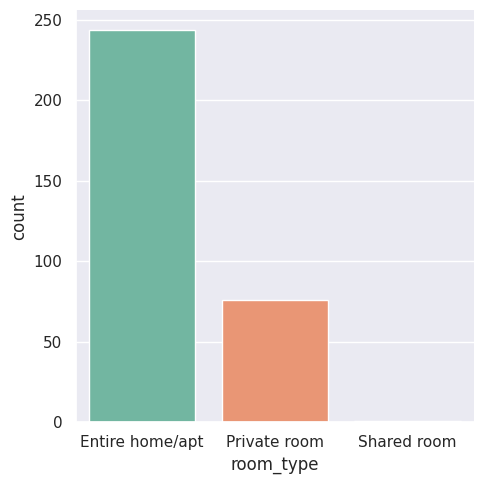

In [15]:
#Number of room types
print("Number of room types :", len(listingDF["room_type"].unique()))
print()

#Number of listings of each room type
print(listingDF["room_type"].value_counts())
sb.catplot(x = "room_type", data = listingDF, kind = "count", palette="Set2")

The dataset contains 3 types of rooms — Entire home/apt, Private room, and Shared room.
Among them, Entire home/apt dominates with 244 listings, followed by Private room (76), while Shared room has only one listing, indicating that full-property rentals are the most common.

# Analyzing the listings based on the property type.bold text

Number of property types : 19

property_type
Entire rental unit                   164
Entire home                           51
Private room in home                  47
Private room in rental unit           13
Entire condo                           8
Entire townhouse                       7
Private room in townhouse              5
Private room in bed and breakfast      5
Room in hotel                          5
Entire vacation home                   4
Entire loft                            2
Entire guest suite                     2
Entire serviced apartment              2
Entire place                           1
Private room in guest suite            1
Room in aparthotel                     1
Entire cottage                         1
Entire guesthouse                      1
Shared room in rental unit             1
Name: count, dtype: int64


/tmp/ipython-input-2906825152.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sb.catplot(


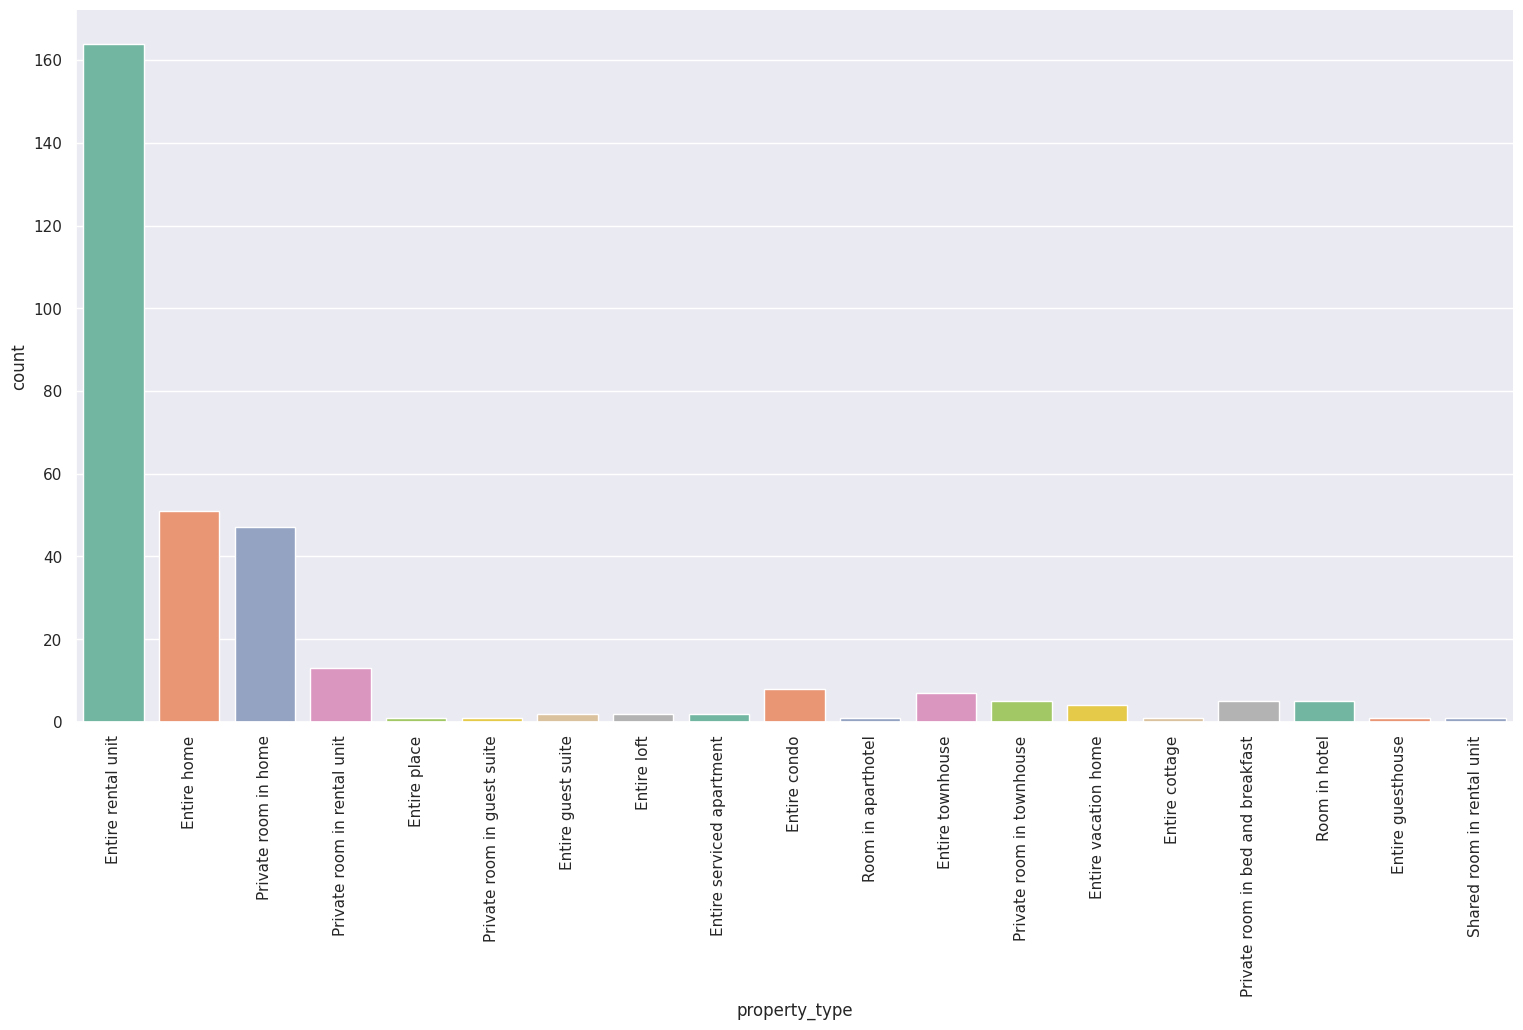

In [17]:
#Number of property types
print("Number of property types :", len(listingDF["property_type"].unique()))
print()

#Number of listings of each property type
print(listingDF["property_type"].value_counts())

#Plot with vertical x-axis labels
g = sb.catplot(
    x="property_type",
    data=listingDF,
    kind="count",
    palette="Set2",
    height=8,
    aspect=2
)

#Rotate x-axis labels vertically
g.set_xticklabels(rotation=90)

plt.show()

The dataset includes 19 distinct property types, with ‘Entire rental unit’ being the most common (164 listings). It is followed by ‘Entire home’ (51) and ‘Private room in home’ (47), while several categories such as ‘Entire guesthouse’ and ‘Shared room in rental unit’ have only one listing, indicating a strong dominance of full-unit rentals in the dataset.

# Analyzing the prices for the different room and property types.

In [18]:
#Checking out the mean prices for the different room and property types
roomProperty_DF = listingDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
3,Entire guesthouse,Entire home/apt,364.000000
4,Entire home,Entire home/apt,228.137255
6,Entire place,Entire home/apt,214.000000
1,Entire cottage,Entire home/apt,212.000000
17,Room in hotel,Private room,201.400000


The highest average prices are observed for Entire guesthouse ($364), followed by Entire home ($228) and Entire place ($214).
This indicates that fully private accommodations, particularly guesthouses and entire homes, tend to be priced significantly higher compared to other property types such as private rooms in hotels.

<Axes: xlabel='room_type', ylabel='property_type'>

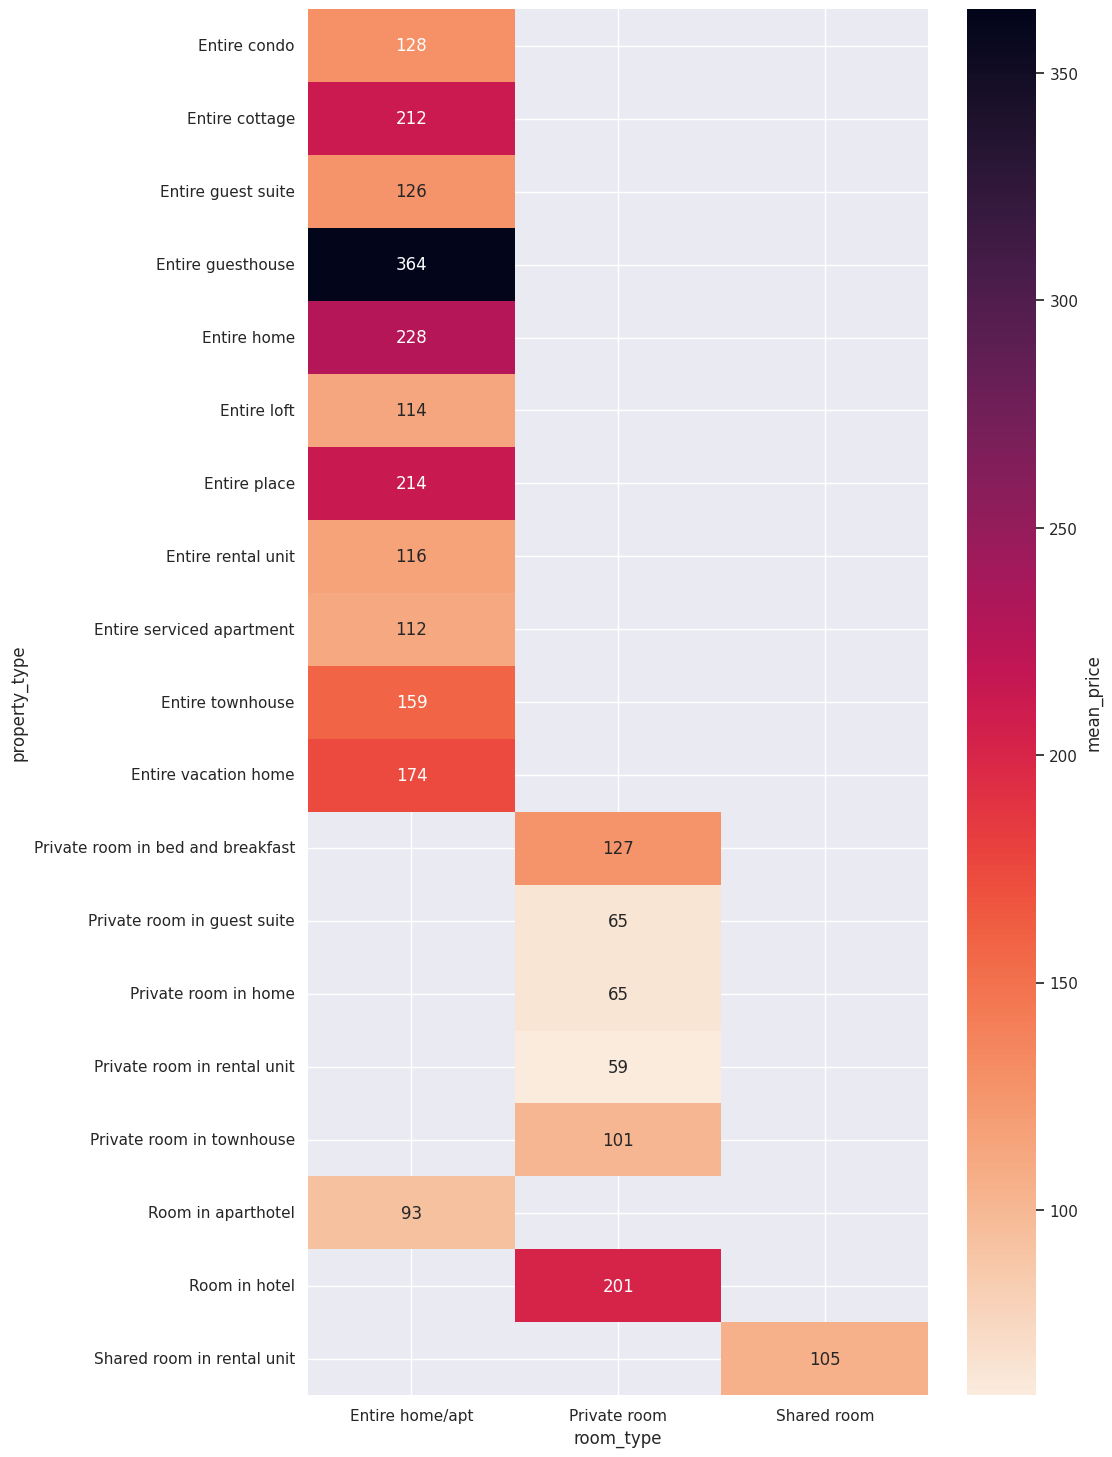

In [19]:
#Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,18))
sb.heatmap(listingDF.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

The heatmap shows that Entire guesthouses ($364), Entire homes ($228), and Entire places ($214) command the highest average prices among all property types. In contrast, private rooms in guest suites ($65) and private rooms in rental units ($59) are the least expensive, indicating that fully private accommodations are significantly costlier than shared or partial rentals.

# Anaylzing the listings based on the number of bedrooms.

<Axes: xlabel='bedrooms', ylabel='price'>

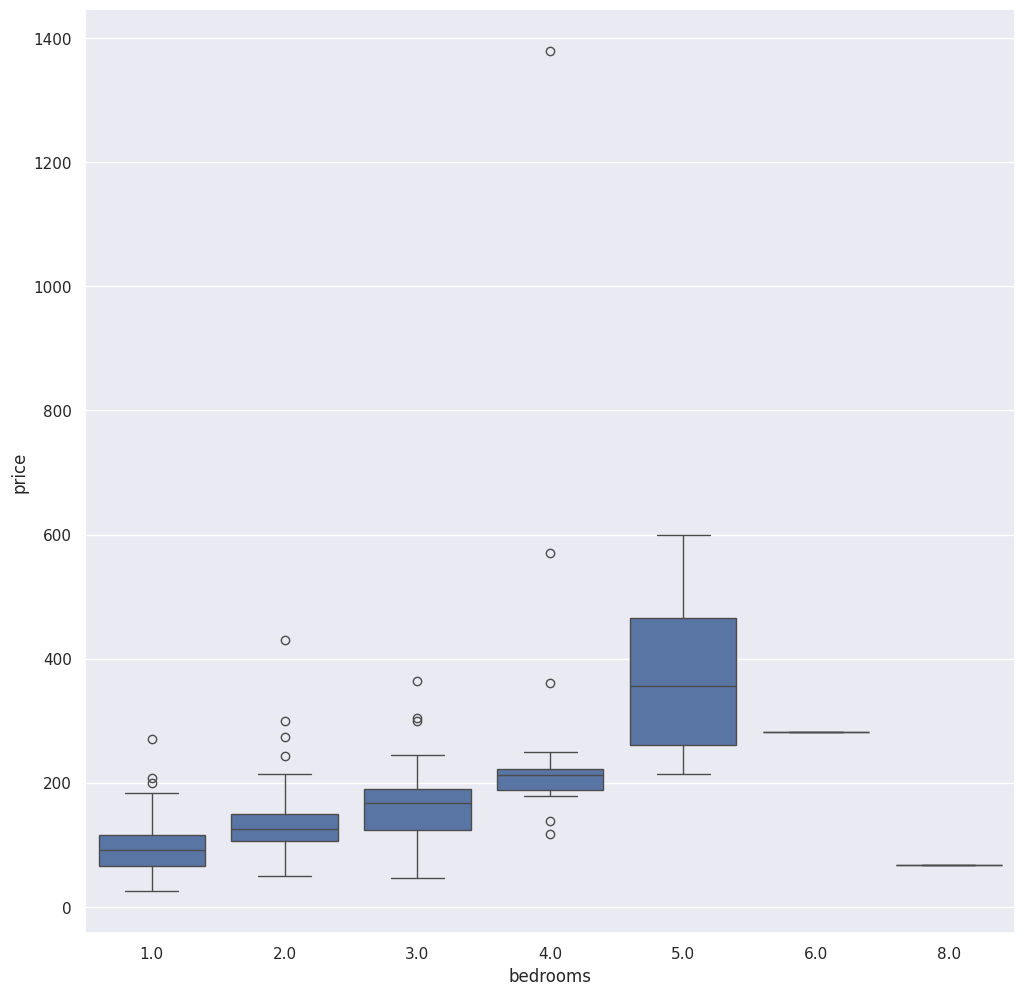

In [20]:
#Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sb.boxplot(x='bedrooms', y='price', data=listingDF[['bedrooms', 'price']])

The boxplot indicates a positive correlation between the number of bedrooms and price, where listings with more bedrooms tend to have higher median prices. However, there are several outliers, especially for 4- and 5-bedroom properties, showing that some large listings are priced exceptionally high compared to others.

In [21]:
#Creating a number of rooms vs property type dataframe
noRoomDF = listingDF[['property_type', 'bedrooms']]
noRoomDF.head(n=15)

,property_type,bedrooms
0,Entire rental unit,2.0
1,Entire rental unit,1.0
3,Entire rental unit,1.0
4,Entire home,3.0
5,Private room in home,1.0
6,Entire rental unit,1.0
7,Private room in rental unit,1.0
8,Entire home,1.0
9,Entire place,3.0
11,Private room in home,1.0


The dataset shows that most private rooms and rental units typically have 1 bedroom, while entire homes and places often have 2 to 4 bedrooms. This suggests that listings offering the whole property generally provide larger accommodation space compared to single-room rentals.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='bedrooms', ylabel='property_type'>

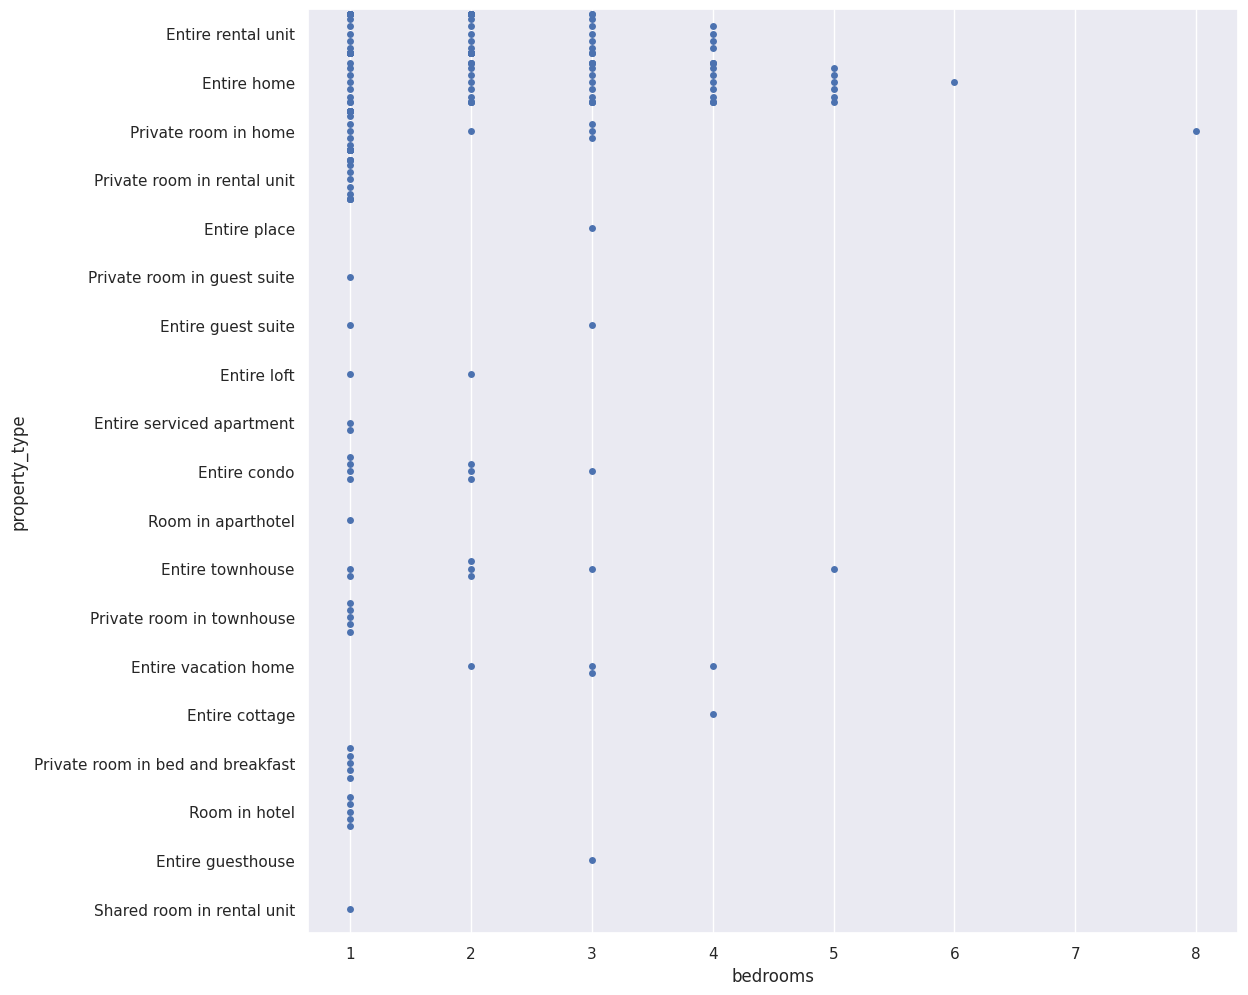

In [22]:
#Plotting a swarmplot to visually see the number of listings for each room_type and the no. bedrooms
plt.figure(figsize=(12,12))
sb.swarmplot(x='bedrooms', y='property_type', data=noRoomDF)

The swarm plot shows that most property types cluster around 1–3 bedrooms, with entire rental units and homes covering a wider range of bedroom counts. Very few listings have more than 4 bedrooms, indicating that smaller accommodations dominate the dataset.

<Axes: xlabel='bedrooms', ylabel='property_type'>

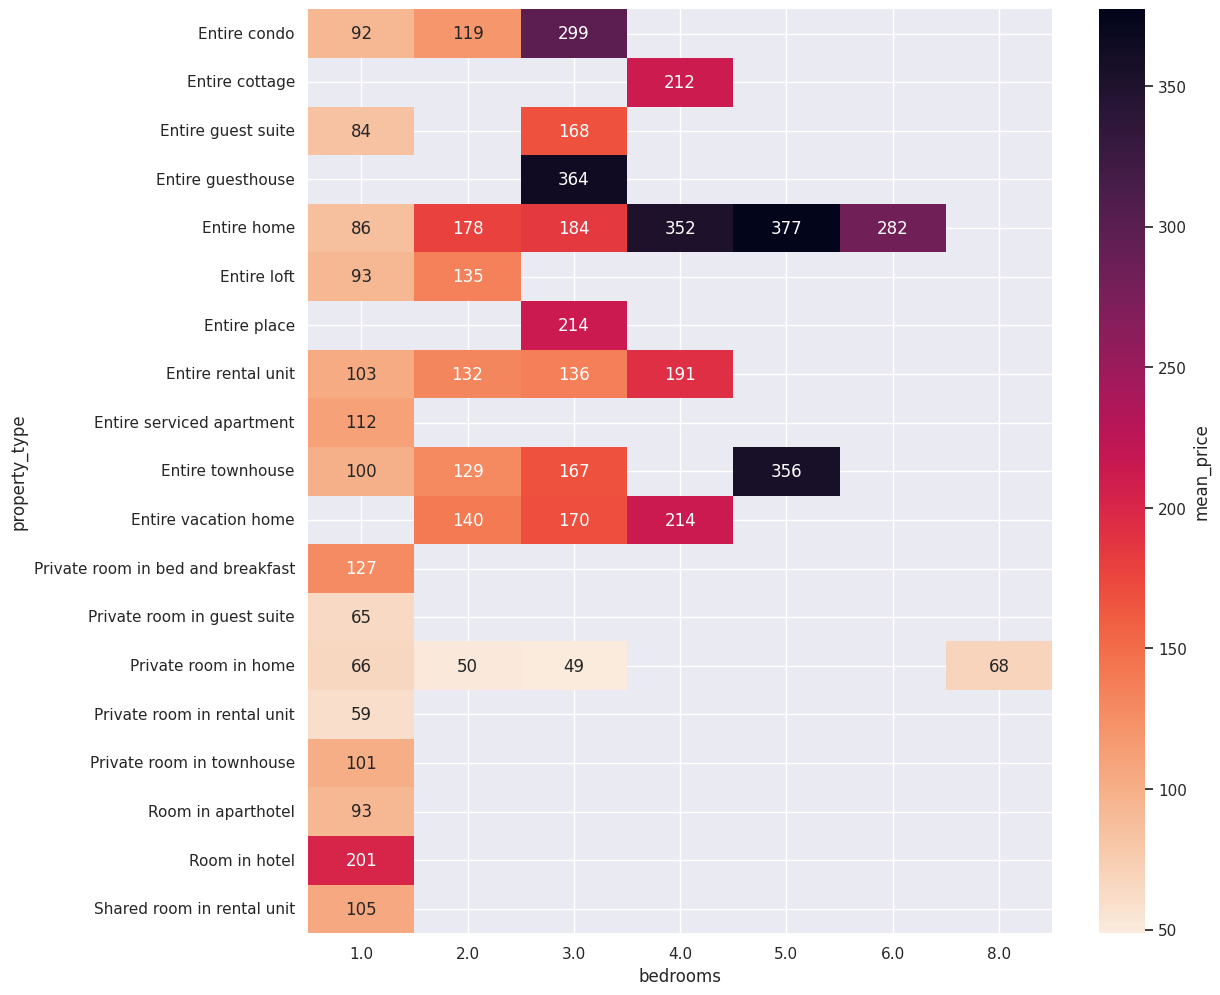

In [23]:
Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sb.heatmap(listingDF.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'})

The heatmap reveals that larger properties with more bedrooms generally have higher average prices, with the entire guesthouse ($364) and 5–6 bedroom entire homes ($352–$377) being the most expensive. In contrast, 1-bedroom private rooms and rental units show the lowest mean prices, highlighting a clear relationship between property size and pricing.

In [24]:
#Number of bedrooms
print("Number of bedrooms :", len(listingDF["bedrooms"].unique()))
print()
print("BedRms|Listings")
#Number of listings of each room type
print(listingDF["bedrooms"].value_counts())

Number of bedrooms : 7

BedRms|Listings
bedrooms
1.0    188
2.0     74
3.0     33
4.0     17
5.0      7
6.0      1
8.0      1
Name: count, dtype: int64


The dataset includes 7 unique bedroom counts, with 1-bedroom listings dominating (188 out of total). Listings with 2 or 3 bedrooms are moderately common, while large properties (5+ bedrooms) are rare, suggesting that smaller accommodations are far more prevalent in the dataset.

# Analyzing if any particular ammenity results in higher prices.

We are going to analyze the textual data of ammenities by finding the words that appear most frequently in ammenities in the most expensive listings.

In [26]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
import nltk
from nltk.corpus import stopwords
import re

#Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = listingDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')]
wnl = nltk.WordNetLemmatizer()
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

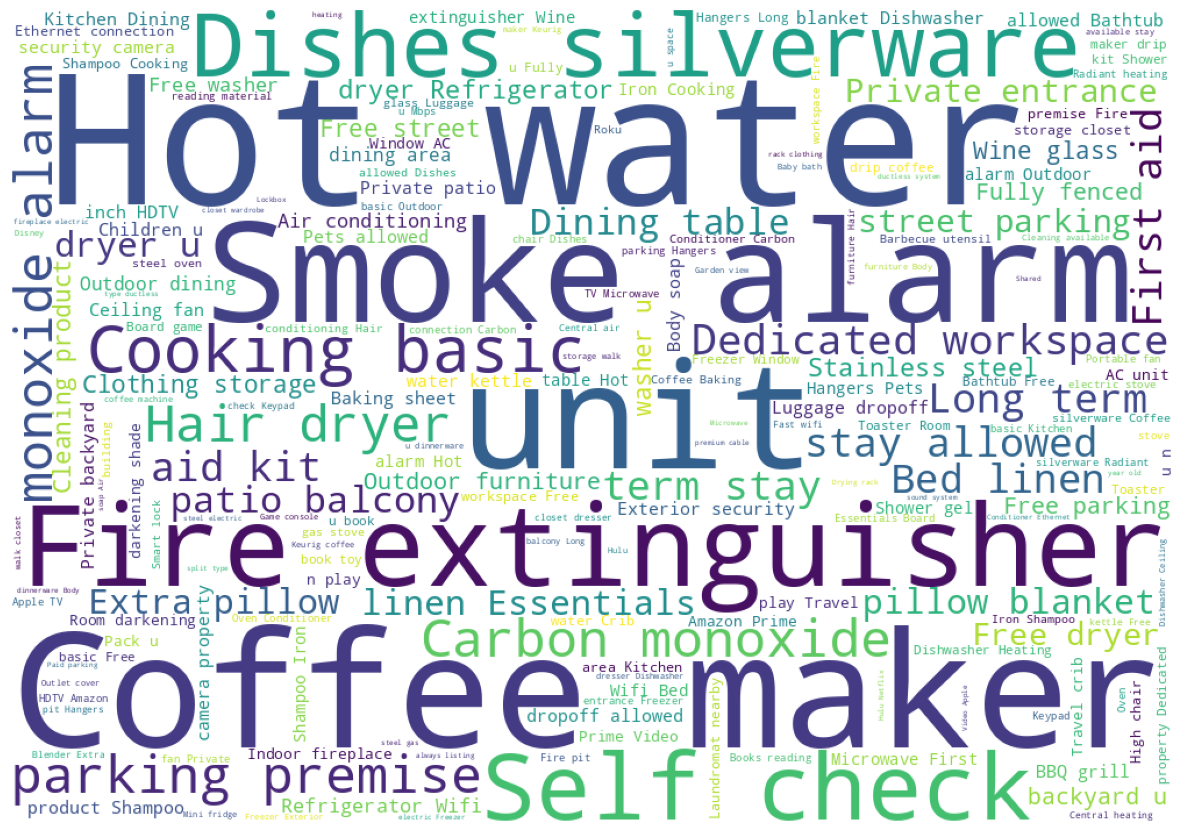

In [28]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The word cloud of amenities from the top 30 most expensive listings highlights “Hot water,” “Smoke alarm,” “Coffee maker,” “Fire extinguisher,” and “Self check-in” as the most common features. This suggests that safety amenities and comfort essentials are key offerings among high-priced properties.

From the analysis, it is evident that:
1. type of room significantly impacts pricing—entire homes/apartments dominate the listings and command the highest prices.
2. The property type also influences cost, with entire guesthouses, homes, and cottages among the most expensive, while shared or private rooms remain more affordable.
3. A clear positive trend exists between the number of bedrooms and the average price, as larger properties generally cost more.
4. Lastly, common amenities in top-priced listings include hot water, smoke alarms, coffee makers, fire extinguishers, and self check-in, indicating that comfort and safety features are key contributors to higher listing values.